In [2]:
import random as rd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math
import pylab
import scipy.stats as stats
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = pd.read_csv("inputData/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Explore the data set

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# the "cabin" column has relatively few entries
# there are also some empty entries for age

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualization

<Axes: >

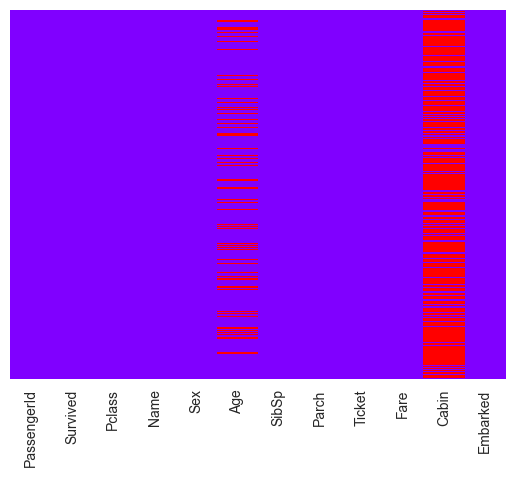

In [7]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap ="rainbow")
# Age and Cabin are a lot of NaN data

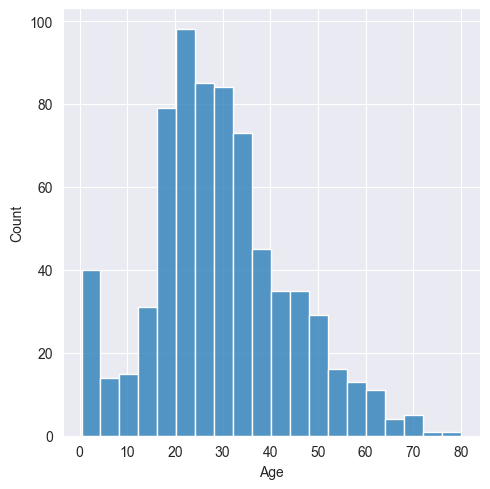

In [8]:
# View the distribution of age
sns.displot(df["Age"])

<Axes: xlabel='Survived', ylabel='count'>

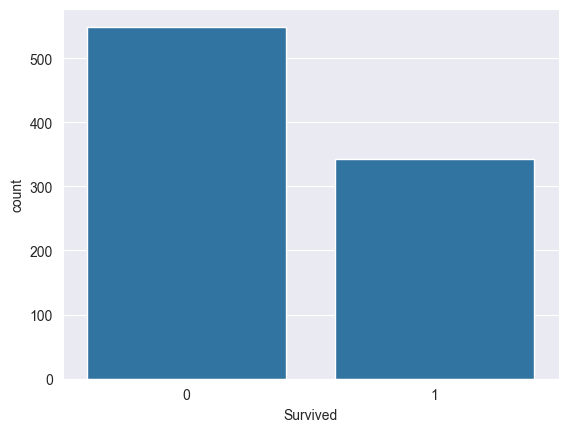

In [9]:
# How many survived?
sns.countplot(x="Survived",data=df)

<Axes: xlabel='Survived', ylabel='count'>

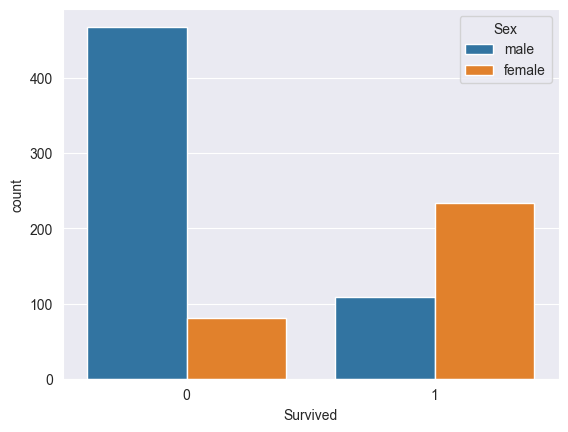

In [10]:
sns.countplot(x="Survived",data=df,hue="Sex")
# In relation, women survived much more often. "Women and children first".

<Axes: xlabel='Survived', ylabel='count'>

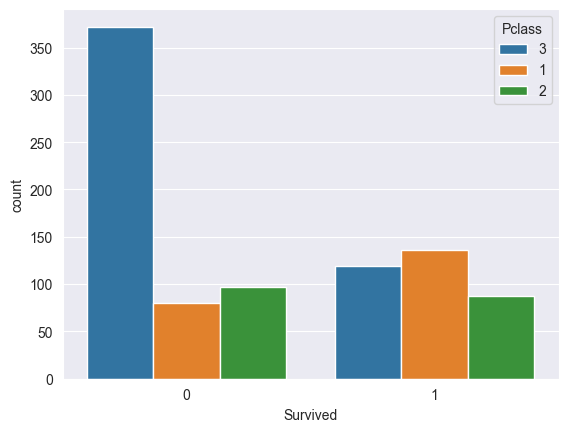

In [11]:
df['Pclass'] = df['Pclass'].astype(str)
sns.countplot(x="Survived",data=df,hue="Pclass")
# Passengers in 3rd class (apparently the cheaper tickets) also survived proportionally less.

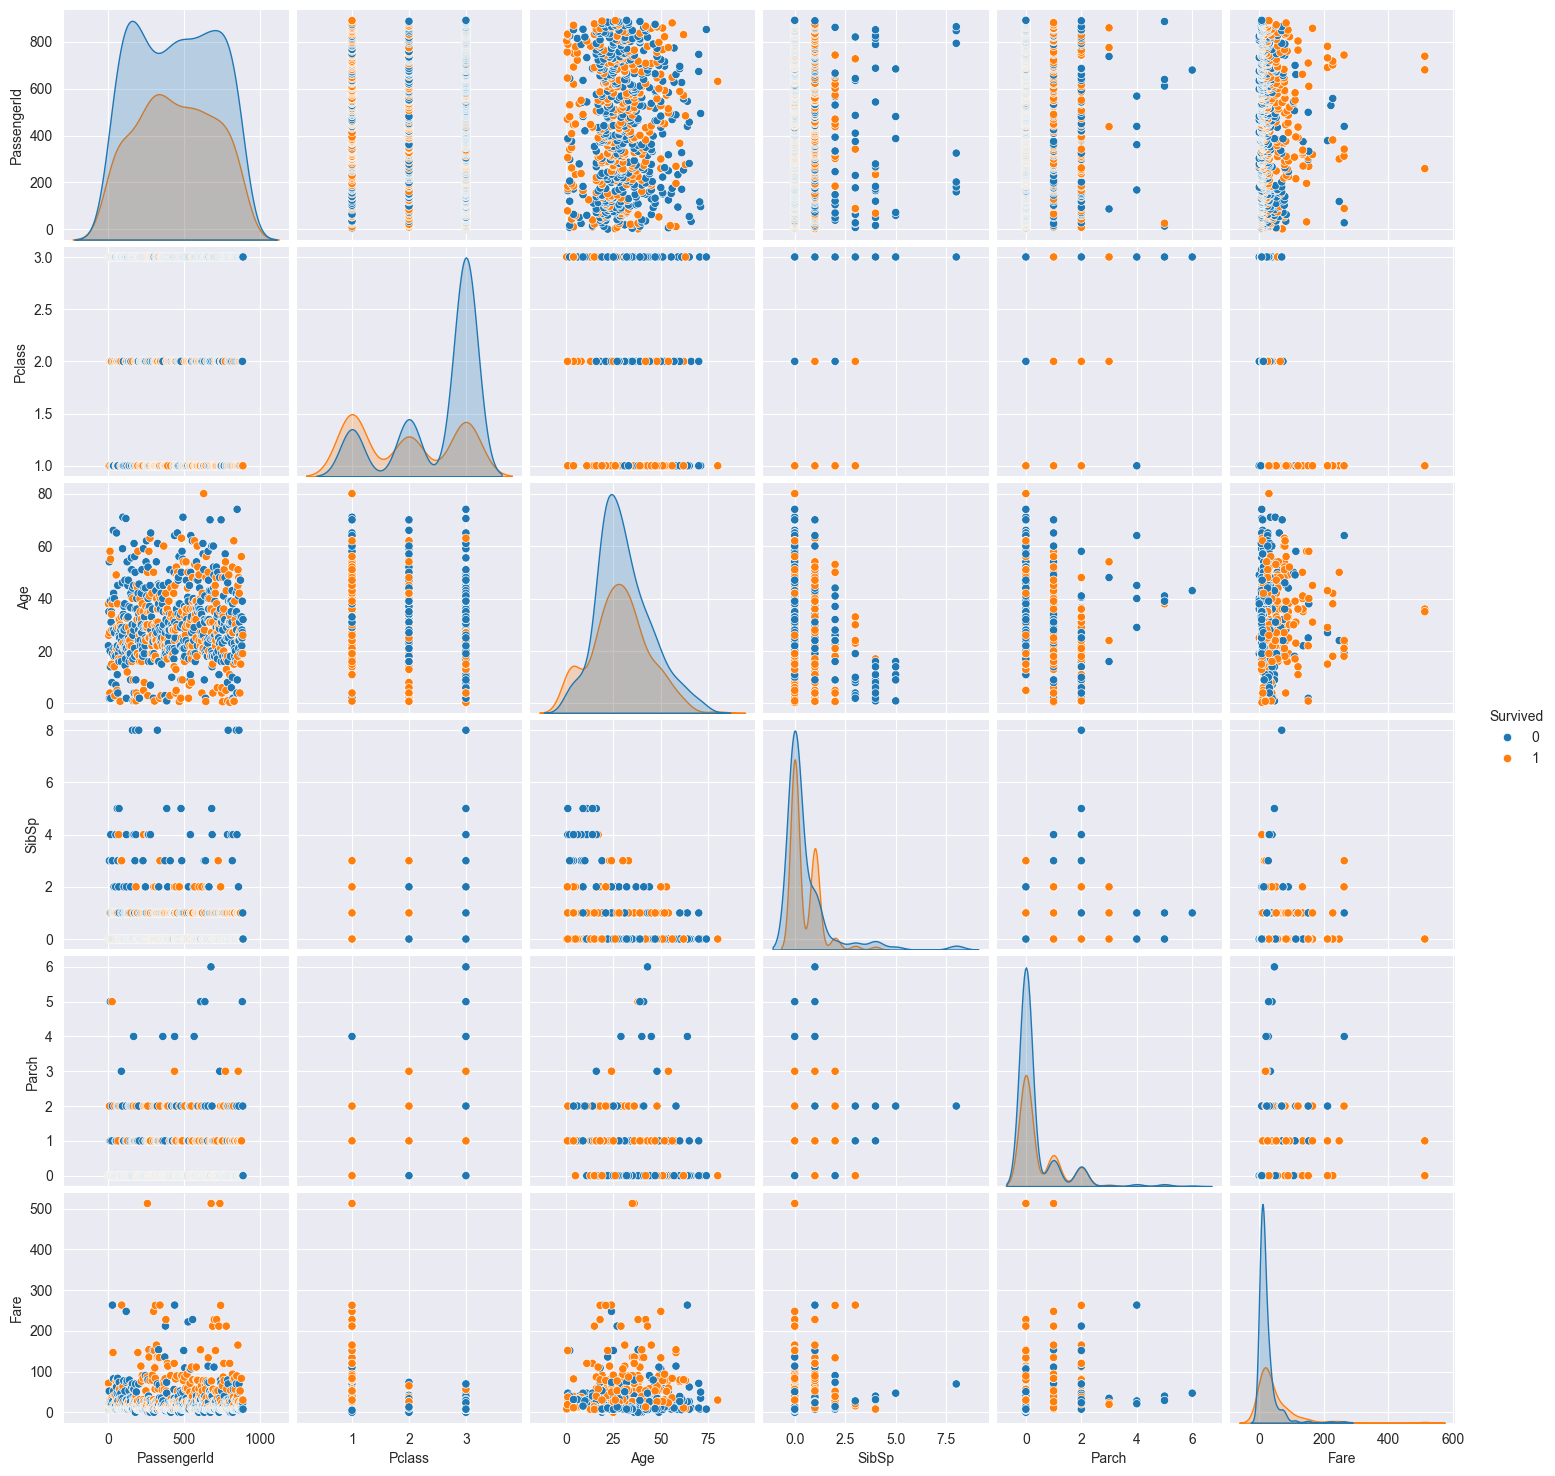

In [12]:
df['Pclass'] = df['Pclass'].astype(int)
sns.pairplot(df,hue="Survived")

In [13]:
# For example: "Pclass" and "Fare", prices for 1st class are higher and 
# these passengers have also survived more often.
# With these plots, we can understand a lot about 
# the relationships between the variables and the effect on our dependent variable.
# We also see the distributions for the variables grouped according to the dependent variable.

## Clean up data

In [14]:
df.drop("Cabin",axis=1,inplace=True)

<Axes: >

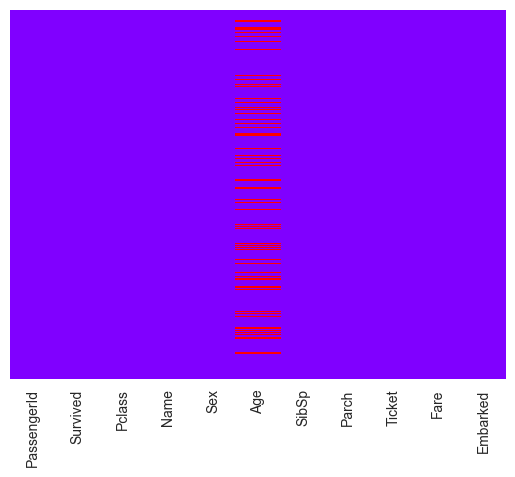

In [15]:
# We still need to handle the missing values in the "Age" column.
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap ="rainbow")

<Axes: xlabel='Pclass', ylabel='Age'>

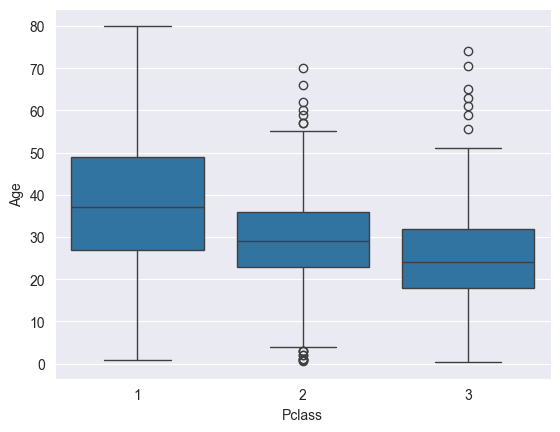

In [16]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [17]:
# We replace the age for each class with the average age of the passenger class
for i in df.index:
    if pd.isnull(df.at[i, "Age"]):
        pclass = df.at[i,"Pclass"]
        pclass_1_data = df[df['Pclass'] == pclass]
        mean_age_pclass = pclass_1_data['Age'].mean()
        df.at[i, "Age"] = mean_age_pclass
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


<Axes: >

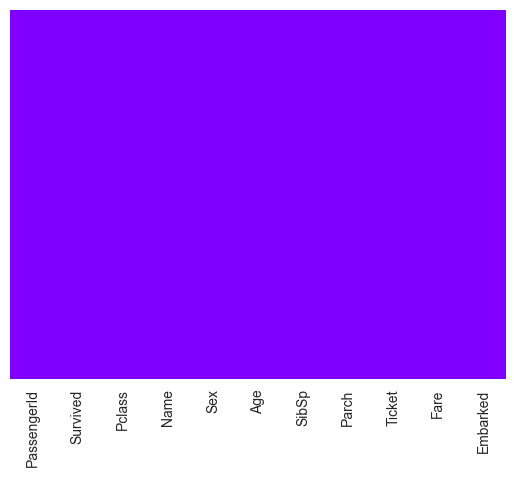

In [18]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap ="rainbow")
# looks good now

In [19]:
df.info()
# There are still 2 missing values for Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int32  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 73.2+ KB


In [20]:
df.dropna(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int32  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 79.9+ KB


## Preparing data for analysis

In [22]:
df["Sex"]
# We cannot use the categorical variables in the analysis in this way.

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 889, dtype: object

In [23]:
# Conversion of the categorical variable to dummy variables
sex = pd.get_dummies(df['Sex'], drop_first=True).astype(int)
sex
# Now this variable is a dummy variable coded in 0 and 1 (1 = male, 0 = female)
# If we set drop_first = True, then the first column of the dummy variable is deleted. 
# This is not required for the analysis, 
# as 0 in the 2nd column contains the same information as 1 in this column.

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [24]:
# Add the dummy variables to the original DataFrame
df = pd.concat([df, sex], axis=1)
df



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C,1


In [25]:
# Now we can delete the original column "Sex" and would like to rename the new column.
df.drop(["Sex"],axis=1,inplace=True)
df.rename(columns={"male":"sex"},inplace=True)
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,sex
0,1,0,3,"Braund, Mr. Owen Harris",22.00000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00000,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.00000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00000,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.00000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.00000,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.00000,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",25.14062,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.00000,0,0,111369,30.0000,C,1


In [26]:
# Your task: Which columns still need to be recoded to dummy variables? 
# Carry out the recoding.

port = pd.get_dummies(df['Embarked'], drop_first=True).astype(int)
df = pd.concat([df, port], axis=1)
df.drop(["Embarked"],axis=1,inplace=True)
df.rename(columns={"Q":"port_Q","S":"port_S"},inplace=True)
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,sex,port_Q,port_S
0,1,0,3,"Braund, Mr. Owen Harris",22.00000,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00000,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.00000,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00000,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.00000,0,0,373450,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.00000,0,0,211536,13.0000,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.00000,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",25.14062,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.00000,0,0,111369,30.0000,1,0,0


In [27]:
# Now we will create a new data frame with all the variables to be included in the analysis.
df.drop(["PassengerId","Ticket","Name"],axis=1,inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,sex,port_Q,port_S
0,0,3,22.00000,1,0,7.2500,1,0,1
1,1,1,38.00000,1,0,71.2833,0,0,0
2,1,3,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,1,0,1
887,1,1,19.00000,0,0,30.0000,0,0,1
888,0,3,25.14062,1,2,23.4500,0,0,1
889,1,1,26.00000,0,0,30.0000,1,0,0


In [28]:
# insert the library sklearn
from sklearn.model_selection import train_test_split

In [29]:
# Determine what our independent variables are and what our dependent variable is.
X = df.drop("Survived",axis=1)
y = df["Survived"]

In [30]:
# First we divide the data set into training and test
# We always need a data set with which we train our model and a data set with which we test this model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# test_size specifies how large our test portion of the data set is (33% in this case)

In [31]:
# X_train are the independent variables of the training data set.
X_train

,Pclass,Age,SibSp,Parch,Fare,sex,port_Q,port_S
6,1,54.00000,0,0,51.8625,1,0,1
576,2,34.00000,0,0,13.0000,0,0,1
445,1,4.00000,0,2,81.8583,1,0,1
74,3,32.00000,0,0,56.4958,1,0,1
670,2,40.00000,1,1,39.0000,0,0,1
...,...,...,...,...,...,...,...,...
107,3,25.14062,0,0,7.7750,1,0,1
271,3,25.00000,0,0,0.0000,1,0,1
862,1,48.00000,0,0,25.9292,0,0,1
436,3,21.00000,2,2,34.3750,0,0,1


## Data analysis

In [32]:
# Which method to estimate model? 
# We use logistic regression, since dependent 0 and 1 variable
from sklearn.linear_model import LogisticRegression

In [33]:
logReg_df = LogisticRegression(max_iter = 10000)
logReg_df.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [34]:
predictions = logReg_df.predict(X_test)

In [35]:
predictions


array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [36]:
#X_test["predictions"]=predictions
#X_test["survived"]=y_test
X_test

,Pclass,Age,SibSp,Parch,Fare,sex,port_Q,port_S
281,3,28.000000,0,0,7.8542,1,0,1
435,1,14.000000,1,2,120.0000,0,0,1
39,3,14.000000,1,0,11.2417,0,0,0
418,2,30.000000,0,0,13.0000,1,0,1
585,1,18.000000,0,2,79.6500,0,0,1
...,...,...,...,...,...,...,...,...
711,1,38.233441,0,0,26.5500,1,0,1
840,3,20.000000,0,0,7.9250,1,0,1
381,3,1.000000,0,2,15.7417,0,0,0
141,3,22.000000,0,0,7.7500,0,0,1


In [37]:
# How well did the model perform?

In [38]:
from sklearn.metrics import confusion_matrix

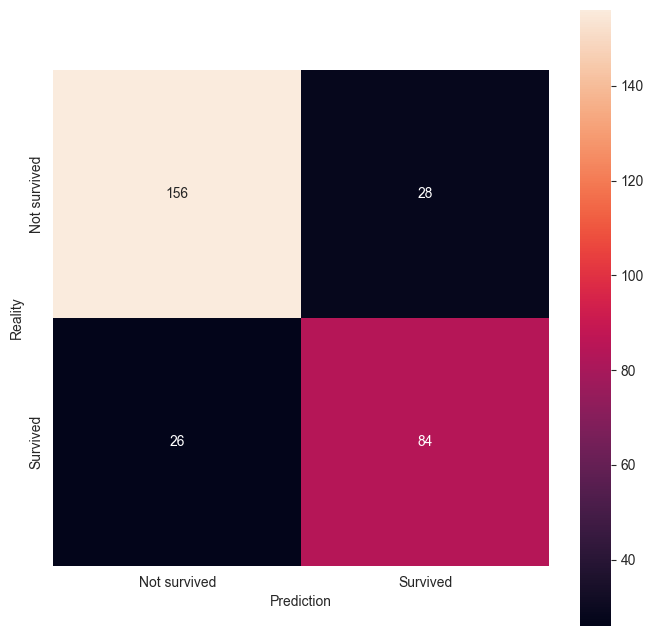

In [39]:
matrix = confusion_matrix(y_test, predictions)
fig = plt.figure(figsize=(8,8))
sns.heatmap(matrix,square=True,annot=True,fmt="d",cbar=True,
            xticklabels=("Not survived","Survived"),
            yticklabels=("Not survived","Survived"))
plt.ylabel("Reality")
plt.xlabel("Prediction")
plt.show()

In [40]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, predictions)

# Output the accuracy
print("Accuracy:", accuracy * 100, "%")

Accuracy: 81.63265306122449 %


In [41]:
# Trying to find a better model

In [42]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,sex,port_Q,port_S
0,0,3,22.00000,1,0,7.2500,1,0,1
1,1,1,38.00000,1,0,71.2833,0,0,0
2,1,3,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,1,0,1
887,1,1,19.00000,0,0,30.0000,0,0,1
888,0,3,25.14062,1,2,23.4500,0,0,1
889,1,1,26.00000,0,0,30.0000,1,0,0


In [43]:
# insert an intercept
df['intercept'] = 1

X = df[['intercept', "Pclass","Age","SibSp","Parch","Fare","sex","port_Q","port_S"]]


y = df['Survived']

# Perform logistic regression without intercept
logit_model = sm.Logit(y, X)
result = logit_model.fit()


result.summary()

Optimization terminated successfully.
         Current function value: 0.439351
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                            8
Date:                Fri, 02 Feb 2024   Pseudo R-squ.:                  0.3396
Time:                        14:10:19   Log-Likelihood:                -390.58
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 8.304e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5661      0.592      9.396      0.000       4.405       6.727
Pclass        -1.1816      0.149     -7.906      0.000      -1.475      -0.889
Age           -0.0435      0.008     -5.307      0.000      -0.059      -0.027
SibSp         -0.3407      0.110     -3.091      0.002      -0.557      -0.125
Parch         -0.0902      0.120     -0.754      0.451      -0.325       0.144
Fare           0.0017      0.002      0.729      0.466      -0.003       0.006
sex           -2.7255      0.202    -13.510      0.000      -3.121      -2.330
port_Q        -0.0983      0.382     -0.257      0.797      -0.847       0.651
port_S        -0.3958      0.237     -1.668      0.095      -0.861       0.069
==============================================================================
"""

In [44]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,sex,port_Q,port_S,intercept
0,0,3,22.00000,1,0,7.2500,1,0,1,1
1,1,1,38.00000,1,0,71.2833,0,0,0,1
2,1,3,26.00000,0,0,7.9250,0,0,1,1
3,1,1,35.00000,1,0,53.1000,0,0,1,1
4,0,3,35.00000,0,0,8.0500,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,1,0,1,1
887,1,1,19.00000,0,0,30.0000,0,0,1,1
888,0,3,25.14062,1,2,23.4500,0,0,1,1
889,1,1,26.00000,0,0,30.0000,1,0,0,1
